In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl

exchange='WIKI'
ticker='AMZN'

df = quandl.get('%s/%s' % (exchange, ticker),api_key='xCpdYQzqjxgooYJ7zisz')
stock=df.copy()
data=df.copy()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: 
.resample() is now a deferred operation
You called reset_index(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: 
.resample() is now a deferred operation
You called reset_index(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  # Remove the CWD from sys.path while we load stuff.


predicted=846.763294, expected=856.000000
predicted=856.797294, expected=874.320000
predicted=876.302810, expected=876.340000
predicted=878.061164, expected=886.540000
predicted=886.547267, expected=888.196667
predicted=888.511761, expected=889.853333
predicted=888.750709, expected=891.510000
predicted=890.946215, expected=906.830000
predicted=908.787570, expected=909.280000
predicted=909.876899, expected=898.280000
predicted=897.908953, expected=894.880000
predicted=894.759841, expected=898.933333
predicted=898.627770, expected=902.986667
predicted=903.425653, expected=907.040000
predicted=910.355841, expected=902.360000
predicted=904.482767, expected=896.230000
predicted=894.451663, expected=884.670000
predicted=884.082345, expected=889.000000
predicted=888.600113, expected=893.330000
predicted=894.594088, expected=897.660000
predicted=899.576840, expected=901.990000
predicted=903.453279, expected=903.780000
predicted=902.834497, expected=899.200000
predicted=898.312193, expected=902

predicted=1174.572962, expected=1168.360000
predicted=1168.112879, expected=1170.460000
predicted=1169.994534, expected=1172.560000
predicted=1174.377870, expected=1174.660000
predicted=1176.196731, expected=1176.760000
predicted=1177.451357, expected=1182.260000
predicted=1182.934051, expected=1186.100000
predicted=1186.660701, expected=1169.470000
predicted=1170.210113, expected=1174.355000
predicted=1173.472965, expected=1179.240000
predicted=1179.185705, expected=1184.125000
predicted=1184.178798, expected=1189.010000
predicted=1190.517656, expected=1204.200000
predicted=1205.660564, expected=1209.590000
predicted=1209.333133, expected=1229.140000
predicted=1229.913348, expected=1235.050000
predicted=1237.832351, expected=1240.960000
predicted=1241.316593, expected=1246.870000
predicted=1246.105453, expected=1252.700000
predicted=1253.039569, expected=1254.330000
predicted=1254.035728, expected=1276.680000
predicted=1276.920267, expected=1305.200000
predicted=1308.996048, expected=

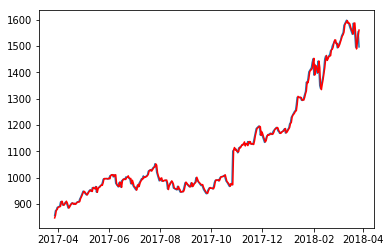

Date
2017-03-28     846.763294
2017-03-29     856.797294
2017-03-30     876.302810
2017-03-31     878.061164
2017-04-01     886.547267
2017-04-02     888.511761
2017-04-03     888.750709
2017-04-04     890.946215
2017-04-05     908.787570
2017-04-06     909.876899
2017-04-07     897.908953
2017-04-08     894.759841
2017-04-09     898.627770
2017-04-10     903.425653
2017-04-11     910.355841
2017-04-12     904.482767
2017-04-13     894.451663
2017-04-14     884.082345
2017-04-15     888.600113
2017-04-16     894.594088
2017-04-17     899.576840
2017-04-18     903.453279
2017-04-19     902.834497
2017-04-20     898.312193
2017-04-21     902.286726
2017-04-22     898.441190
2017-04-23     901.473235
2017-04-24     906.140726
2017-04-25     907.978067
2017-04-26     906.680094
                 ...     
2018-02-26    1523.234885
2018-02-27    1523.308633
2018-02-28    1508.268057
2018-03-01    1510.169790
2018-03-02    1494.476167
2018-03-03    1499.441833
2018-03-04    1507.421024
2018-03

In [3]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
def autoregression(train,test):
    train = train.resample('D')
    train = train.reset_index(level=0)
    train = train.interpolate()
    train.index=train['Date']
    train1=train['Adj. Close']
    test1= test.resample('D')
    test1 = test1.reset_index(level=0)
    test1 = test1.interpolate()
    test1.index=test1['Date']
    test=test1['Adj. Close']
    #print train1
    model = AR(train1)
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
    # walk forward over time steps in test
    history = train1[len(train1)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    predictions=pd.Series(predictions,index=test.index)
    # plot
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()
    return predictions

max_date=max(data.index)
end_date=max_date-pd.DateOffset(years=1)
start_date=end_date-pd.DateOffset(years=4)
train=data[(data.index>start_date)&(data.index<=end_date)]['Adj. Close']
test=data[(data.index>end_date)]['Adj. Close']

pred_auto1=autoregression(train,test)
print pred_auto1
print end_date